# Imports

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection as ms

# Synthetic Regression Data

In [2]:
hidde_law = np.vectorize( lambda x: math.sin( 2*math.pi*x ) ) 

In [3]:
x_all = np.arange(0, 1, 0.01)

In [4]:
y_hidden = hidde_law( x_all )

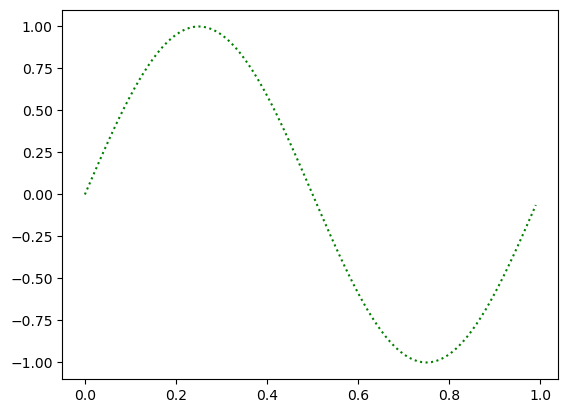

In [5]:
plt.plot(x_all, y_hidden, ':g')

In [8]:
np.random.seed( 42 )
noise = 0.2
samples = 20

# dataset
x = np.random.rand( samples )
y = np.sin( 2*np.pi*x ) + noise * np.random.randn( samples )

#split training and test dataset
x_train, x_val, y_train, y_val = ms.train_test_split(x, y, test_size=0.3)

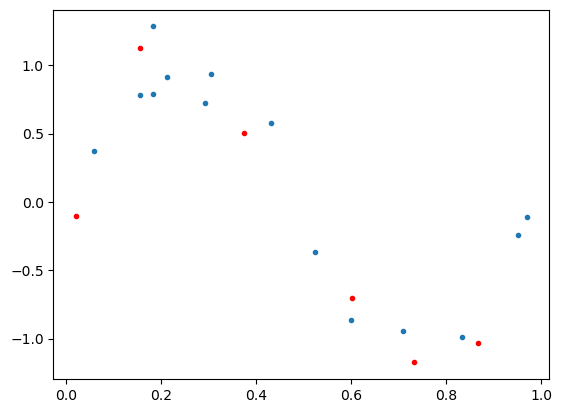

In [9]:
#plt.plot(x_all, y_hidden, ':g')
plt.plot(x_train, y_train, '.')
plt.plot(x_val, y_val, '.r')

# Treinamento

In [10]:
max_poly_dregree = 14
poly_degrees = list(range(max_poly_dregree))
polys = []
for p in poly_degrees:
    poly_model = np.polyfit( x_train, y_train, p)
    polys.append(poly_model)

In [11]:
rmse_train = np.zeros(max_poly_dregree)
rmse_val = np.zeros(max_poly_dregree)

for p in poly_degrees:
    #predict over training
    y_hat_train = np.polyval( polys[p], x_train)
    rmse_train[p] = np.sqrt(np.mean(np.square(y_hat_train - y_train)))
    #predict over validation
    y_hat_val = np.polyval( polys[p], x_val)
    rmse_val[p] = np.sqrt(np.mean(np.square(y_hat_val - y_val)))

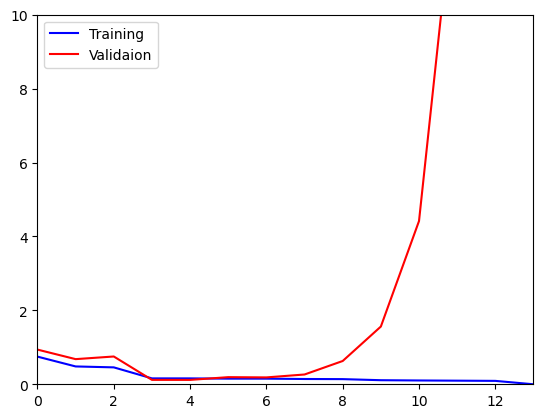

In [18]:
plt.plot(poly_degrees, rmse_train, 'b', label='Training')
plt.plot(poly_degrees, rmse_val, 'r', label='Validaion')
plt.axis((0, max_poly_dregree-1, 0, 10))
plt.legend()

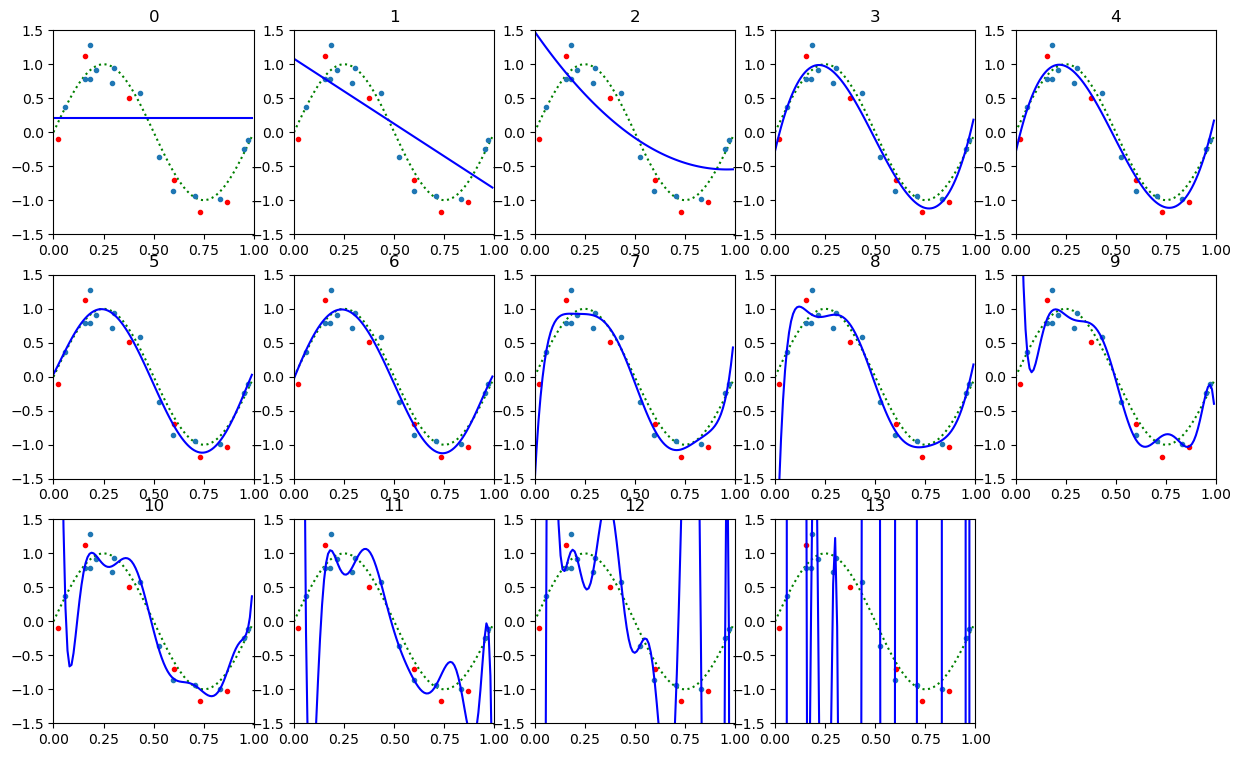

In [20]:
plt.figure( figsize=(15, 9))
for p in poly_degrees:
    y_pol = np.polyval( polys[p], x_all )
    plt.subplot(3, 5, p+1)
    plt.plot(x_all, y_hidden, ':g')
    plt.plot(x_train, y_train, '.')
    plt.plot(x_val, y_val, '.r')
    plt.plot(x_all, y_pol, 'b')
    plt.title(p)
    plt.axis((0, 1, -1.5, 1.5))